# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [27]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
import statsmodels.formula.api as smf

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 

df = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}) # Students data
df

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

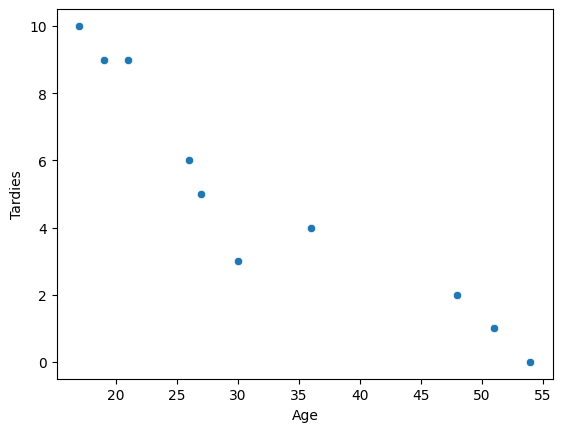

In [3]:
# Your code here.

sns.scatterplot(x = df.Age , y = df.Tardies);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# There is a negative trend and correlation. The higher the age, the lower the amount of tardies. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.

covariance = df.cov()
correlation = df.corr()
cov_tardies = covariance.loc["Tardies"]["Tardies"]
cov_age = covariance.loc["Age"]["Age"]
correlation_age_tardies = correlation.loc["Tardies"]["Age"]

print(f"""
The covariance of age is :{round(cov_age,2)}. 
The covariance of Tardies is :{round(cov_tardies,2)}
The correlation between the age and Tardies is :{round(correlation_age_tardies,2)}
""")


The covariance of age is :187.66. 
The covariance of Tardies is :12.54
The correlation between the age and Tardies is :-0.94



In [8]:
"""Difference between Covariance & Correlation:
Both covariance and correlation measure the relationship and the dependency between two variables. 
Covariance indicates the direction of the linear relationship between variables. 
Correlation measures both the strength and direction of the linear relationship between two variables.

There is a significant negative correlation (-0.94) between age and tardiness, indicating a strong inverse relationship. """

'Difference between Covariance & Correlation:\nBoth covariance and correlation measure the relationship and the dependency between two variables. \nCovariance indicates the direction of the linear relationship between variables. \nCorrelation measures both the strength and direction of the linear relationship between two variables.\n\nThere is a significant negative correlation (-0.94) between age and tardiness, indicating a strong inverse relationship. '

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here.

lr = LinearRegression() 
lr
# Fit the model to my data: draw the line so it accomodates MY datapoints
X = df[['Age']]
y = df.Tardies

modul = lr.fit(X, y) 

print("The lr coefficient is: ",lr.coef_[0])
print("The lr intercept is: ",lr.intercept_)

The lr coefficient is:  -0.2428207709159809
The lr intercept is:  12.888803363135771


Plot your regression model on your scatter plot.

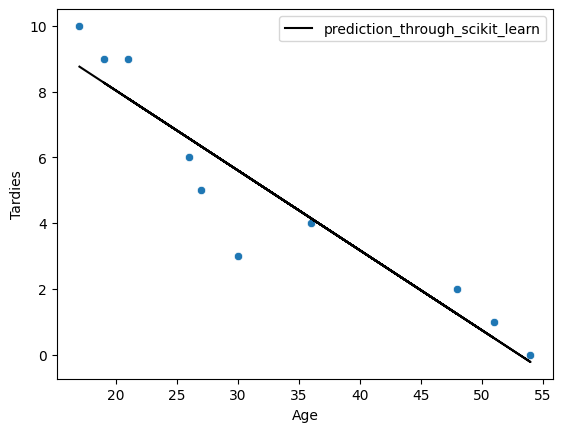

In [13]:
# Your code here.
sns.scatterplot(x=df.Age, y=df.Tardies)
plt.plot(df.Age, df["prediction_through_scikit_learn"], c="black", label="prediction_through_scikit_learn")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [15]:
# Your response here. 
""" Older people tend to be less tardy."""

' Older people tend to be less tardy.'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data

df = pd.read_csv("../lab-regression-analysis/vehicles.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [23]:
df.columns = df.columns.str.replace(' ', '_').str.lower().str.strip().str.rstrip('_')
df.columns = df.columns.str.replace('/','_')
df.sample(3)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels_year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams_mile,fuel_cost_year
23758,Mercedes-Benz,CLK55 AMG,2002,5.4,8.0,Automatic 5-spd,Rear-Wheel Drive,Subcompact Cars,Premium,18.311667,16,22,18,493.722222,2250
14899,GMC,G15/25 Vandura 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
21421,Lexus,RX 300,2002,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Midsize Station Wagons,Regular,18.311667,17,21,18,493.722222,1850


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
# Your response here. 
variables = ["year", "cylinders", "fuel_barrels_year", "combined_mpg", "fuel_cost_year"]
for i in variables:
    outcome_variable = 'co2_emission_grams_mile'
    corr = df[i].corr(df[outcome_variable])
    print(f"The Correleation of the {i} and {outcome_variable} is: {corr}")

The Correleation of the year and co2_emission_grams_mile is: -0.22229960295054216
The Correleation of the cylinders and co2_emission_grams_mile is: 0.752392553729749
The Correleation of the fuel_barrels_year and co2_emission_grams_mile is: 0.9861886621428733
The Correleation of the combined_mpg and co2_emission_grams_mile is: -0.9262290389336436
The Correleation of the fuel_cost_year and co2_emission_grams_mile is: 0.9308651512201842


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here. 
results = smf.ols("co2_emission_grams_mile ~ year + cylinders + fuel_barrels_year + combined_mpg + fuel_cost_year" , data=df).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [34]:
# Your response here. 
import statsmodels.api as sm

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams_mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                             12:36:07   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
fuel_barrels_year    19.0529      0.061    311.600      0.000      18.933      19.173
combined_mpg         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuel_cost_year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [35]:
# Your code here. 
party = pd.DataFrame({'x': [1,3,4,6,8,9,11,14], 'y': [1, 2, 4, 4, 5, 7, 8, 13]})
party.head(2)

,x,y
0,1,1
1,3,2


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [36]:
# Your code here.
p = LinearRegression() 

X = party[["x"]]
y = party.y
p.fit(X,y)

LinearRegression()

In [37]:
party["prediction_linear_reg"] = X * p.coef_[0] + p.intercept_

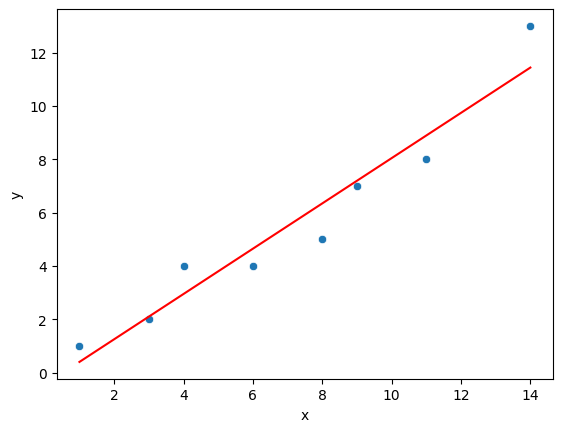

In [38]:
sns.scatterplot(x="x", y="y", data=party)
plt.plot(party.x, party["prediction_linear_reg"], c="r");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [40]:
# Your response here. 
# The visualization in the plot does not correspond with the previous hypothesis. Apparently the more people are invited,
# the more people are attending the party. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 